# Part 2: Sentiment Analysis

This notebook leverages several pre-trained sentiment and emotion models to better understand the underlying tone of the political tweets collected. Tweet text was cleaned in the `data_cleaning.ipynb` notebook.

### General setup

In [1]:
# Import packages 
import pandas as pd 
import re
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Prepare data

In [3]:
# Read in data
data = pd.read_csv('./cleaned_tweet_data.csv')

# View first few rows of data
data.head(2)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,user_location,user_friends_count,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,Washington DC,3110,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,"34.2073° N, 84.1402° W",922,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the ...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...


In [4]:
# Check if there are any rows where with no text data
print('Number of Rows with No Text Data (after cleaning):', data['text_clean'].isnull().values.any().sum())

Number of Rows with No Text Data (after cleaning): 0


In [5]:
# Get number of tweets in dataset 
print('Number of Tweets:', len(data['text']))

Number of Tweets: 51336


From the basic data quality check we see that every cleaned tweet does contain text. For the sentiment analysis, we will be using the cleaned text in the `text_clean` column.

### Perform Sentiment Analysis

#### **VADER Sentiment Analysis**

In [6]:
# Load VADER sentiment model 
vader_sentiment = SentimentIntensityAnalyzer()

# Define function to return sentiment score for a series of text 
def vader_sentiment_scores(text):
  score = vader_sentiment.polarity_scores(text)
  return score['compound']

In [7]:
# function that bins sentiment into positive, negative, and neutral categories based on sentiment score 
def format_output(row):
  polarity = "neutral"
  if(row>= 0.05):
    polarity = "positive"
  elif(row<= -0.05):
    polarity = "negative"

  return polarity

In [8]:
# getting sentiment scores for corpus of text 
data['sentiment_score'] = data['text_clean'].apply(vader_sentiment_scores)

# getting sentiment bins for our data 
data['sentiment_bin'] = data['sentiment_score'].apply(format_output)

In [9]:
# examining data frame with sentiment scores and bins
data.head(3)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,...,user_followers_count,user_favourites_count,user_verfied,user_statuses_count,topic,text_clean,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,...,5830,1445,True,4400,abrams,sharp words on guns in shane hazel to stacey ...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...,0.3818,positive
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,...,752,101529,False,61963,abrams,stacey abrams won tonight she kept to the ...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...,0.7351,positive
2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,897218253826555905,JTaylorSkinner,Jenn Taylor-Skinner (she/her),...,25727,82402,False,43808,abrams,why did joe rogan send his little brother shan...,joe rogan send little brother shane interrupt ...,joe rogan send little brother shane interrupt ...,-0.2500,negative


#### **Pysentimiento Sentiment and Emotion Analysis**

In [10]:
#!pip install pysentimiento

Making model instances for each pysentimiento model

In [11]:
### THIS TAKES A LONG TIME TO RUN 
from pysentimiento import create_analyzer

# loading transformer sentiment model 
analyzer = create_analyzer(task="sentiment", lang="en")

# loading transformer emotion model 
emotion_analyzer = create_analyzer(task="emotion", lang="en")

# loading transformer hate speech model 
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="en")


loading configuration file config.json from cache at /Users/sampastoriza/.cache/huggingface/hub/models--finiteautomata--bertweet-base-emotion-analysis/snapshots/64046df9cc41eab40e1ecde7d2b7fb42b971be5b/config.json
Model config RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-emotion-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "others",
    "1": "joy",
    "2": "sadness",
    "3": "anger",
    "4": "surprise",
    "5": "disgust",
    "6": "fear"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "disgust": 5,
    "fear": 6,
    "joy": 1,
    "others": 0,
    "sadness": 2,
    "surprise": 4
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 

In [12]:
# getting output from transformer sentiment model 
def enhanced_sentiment_scores(text):
    score = analyzer.predict(text) 
    return score

# getting output from transformer emotion model 
def emotion_scores(text):
    score = emotion_analyzer.predict(text) 
    return score

# getting output from transformer hate speech model 
def hate_speech_scores(text):
    score = hate_speech_analyzer.predict(text) 
    return score

In [13]:
### THIS TAKES A LONG TIME TO RUN 

data['pysentimiento_sentiment'] = data['text_clean'].apply(enhanced_sentiment_scores)

data['pysentimiento_emotion'] = data['text_clean'].apply(emotion_scores)

data['pysentimiento_hate'] = data['text_clean'].apply(hate_speech_scores)

In [14]:
data['sentiment_probs'] = data['pysentimiento_sentiment'].apply(lambda x: x.probas)
data['sentiment_output'] = data['pysentimiento_sentiment'].apply(lambda x: x.output)

data['emotion_probs'] = data['pysentimiento_emotion'].apply(lambda x: x.probas)
data['emotion_output'] = data['pysentimiento_emotion'].apply(lambda x: x.output)

data['hate_probs'] = data['pysentimiento_hate'].apply(lambda x: x.probas)
data['hate_output'] = data['pysentimiento_hate'].apply(lambda x: x.output)

In [15]:
data = data.drop(columns=['pysentimiento_sentiment', 'pysentimiento_emotion', 'pysentimiento_hate'])

In [16]:
data.head(5)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,...,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,emotion_output,hate_probs,hate_output
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...,0.3818,positive,"{'NEG': 0.6141573190689087, 'NEU': 0.378498435...",NEG,"{'others': 0.1764051467180252, 'joy': 0.002714...",disgust,"{'hateful': 0.005217170342803001, 'targeted': ...",[]
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...,0.7351,positive,"{'NEG': 0.01712794601917267, 'NEU': 0.41241669...",POS,"{'others': 0.9740970134735107, 'joy': 0.014058...",others,"{'hateful': 0.008792026899755001, 'targeted': ...",[]
2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,897218253826555905,JTaylorSkinner,Jenn Taylor-Skinner (she/her),...,joe rogan send little brother shane interrupt ...,joe rogan send little brother shane interrupt ...,-0.2500,negative,"{'NEG': 0.3434396982192993, 'NEU': 0.649206459...",NEU,"{'others': 0.0670844316482544, 'joy': 0.001664...",disgust,"{'hateful': 0.006042167544364929, 'targeted': ...",[]
3,2022-10-18 00:00:08,Viral handbag designer and EBONY Power100 Styl...,"['StaceyAbrams', 'BrandonBlackwood', 'EBONYMag']",[],[],1,8,39008044,EBONYMag,EBONY MAGAZINE,...,viral handbag designer ebony power style curat...,viral handbag designer ebony power style curat...,0.7184,positive,"{'NEG': 0.001946183037944138, 'NEU': 0.9608251...",NEU,"{'others': 0.9458006024360657, 'joy': 0.044131...",others,"{'hateful': 0.005180110689252615, 'targeted': ...",[]
4,2022-10-18 00:00:11,THE MOST DANGEROUS THING FACING GEORGIA IS 4 M...,[],[],[],212,528,1169707149167140867,MentallyDivine,Brian Baez,...,dangerous thing facing georgia years brian kem...,dangerous thing facing years wow,0.1045,positive,"{'NEG': 0.9752785563468933, 'NEU': 0.021463904...",NEG,"{'others': 0.9482651948928833, 'joy': 0.011214...",others,"{'hateful': 0.013145583681762218, 'targeted': ...",[]


In [17]:
# Save to csv file
data.to_csv('data_with_sentiment.csv', index=False)

In [18]:
sentiment_df = pd.read_csv('data_with_sentiment.csv')
sentiment_df['day'] = pd.to_datetime(sentiment_df['created_at']).dt.floor('d')
sentiment_df = sentiment_df[['created_at', 'day', 'topic', 'sentiment_output', 'hate_output', 'emotion_output']]
sentiment_df = sentiment_df.rename(columns = {
    "sentiment_output": "sentiment",
    "hate_output": "hate",
    "emotion_output": "emotion",
})
sentiment_df

,created_at,day,topic,sentiment,hate,emotion
0,2022-10-18 00:00:00,2022-10-18,abrams,NEG,[],disgust
1,2022-10-18 00:00:01,2022-10-18,abrams,POS,[],others
2,2022-10-18 00:00:01,2022-10-18,abrams,NEU,[],disgust
3,2022-10-18 00:00:08,2022-10-18,abrams,NEU,[],others
4,2022-10-18 00:00:11,2022-10-18,kemp,NEG,[],others
...,...,...,...,...,...,...
51331,2022-11-08 23:59:46,2022-11-08,abrams,NEU,[],others
51332,2022-11-08 23:59:54,2022-11-08,kemp,NEG,[],disgust
51333,2022-11-08 23:59:57,2022-11-08,abrams,NEU,[],others
51334,2022-11-08 23:59:57,2022-11-08,kemp,NEU,[],others


In [19]:
sentiment_df.groupby(['topic']).size()

topic
abrams                    32299
abrams, election            576
abrams, kemp               2228
abrams, kemp, election      780
election                   3726
kemp                      10518
kemp, election             1209
dtype: int64

In [20]:
sentiment_df.groupby(['topic', 'sentiment']).size()

topic                   sentiment
abrams                  NEG          17049
                        NEU          12595
                        POS           2655
abrams, election        NEG            204
                        NEU            317
                        POS             55
abrams, kemp            NEG            887
                        NEU           1215
                        POS            126
abrams, kemp, election  NEG            118
                        NEU            543
                        POS            119
election                NEG           1052
                        NEU           2324
                        POS            350
kemp                    NEG           5143
                        NEU           4718
                        POS            657
kemp, election          NEG            444
                        NEU            705
                        POS             60
dtype: int64

In [21]:
sentiment_df.groupby(['topic', 'hate']).size()

topic                   hate                                 
abrams                  ['hateful', 'aggressive']                   94
                        ['hateful', 'targeted', 'aggressive']      111
                        ['hateful', 'targeted']                   2184
                        ['hateful']                               1634
                        ['targeted', 'aggressive']                   1
                        ['targeted']                                18
                        []                                       28257
abrams, election        ['hateful', 'aggressive']                    1
                        ['hateful', 'targeted']                     23
                        ['hateful']                                 16
                        []                                         536
abrams, kemp            ['hateful', 'aggressive']                    1
                        ['hateful', 'targeted', 'aggressive']        4
               

In [22]:
sentiment_df.groupby(['topic', 'emotion']).size()

topic                   emotion 
abrams                  anger        1564
                        disgust     12781
                        fear          347
                        joy           921
                        others      16386
                        sadness        96
                        surprise      204
abrams, election        anger          22
                        disgust       148
                        joy            21
                        others        382
                        surprise        3
abrams, kemp            anger          58
                        disgust       791
                        fear           17
                        joy            17
                        others       1334
                        sadness         4
                        surprise        7
abrams, kemp, election  anger           7
                        disgust        68
                        joy            86
                        others        617
 

<AxesSubplot:xlabel='day'>

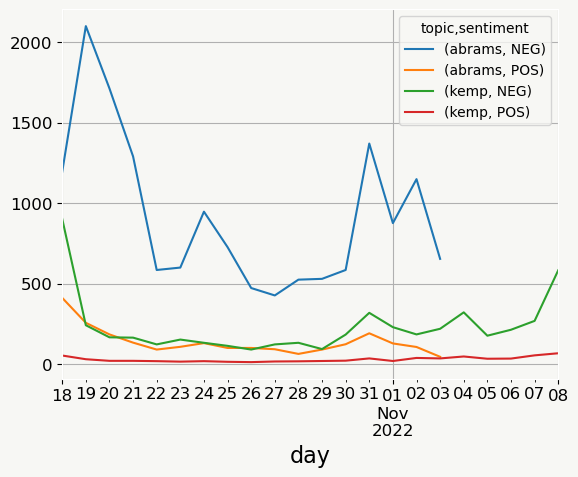

In [23]:
# Time Series Plot
sentiment_candidate_df = sentiment_df[sentiment_df['topic'].isin(['kemp', 'abrams'])]
sentiment_candidate_df = sentiment_candidate_df[sentiment_candidate_df['sentiment'] != 'NEU']
sentiment_candidate_df = sentiment_candidate_df.groupby(['day', 'topic', 'sentiment'], as_index=False).size()
pd.DataFrame(sentiment_candidate_df.pivot(index="day", columns=["topic", "sentiment"], values="size")).plot()

<AxesSubplot:xlabel='day'>

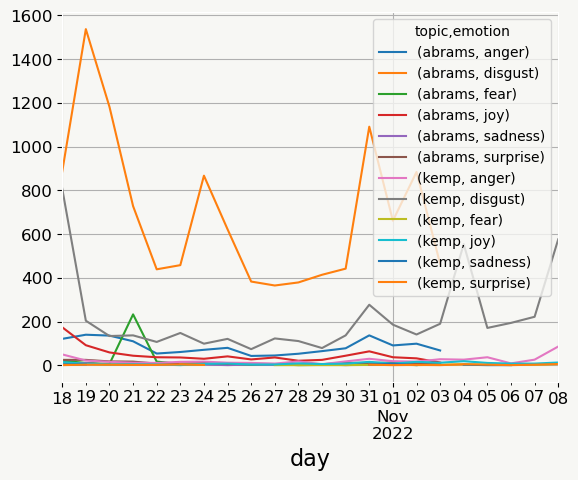

In [24]:
# Time Series Plot
emotion_candidate_df = sentiment_df[sentiment_df['topic'].isin(['kemp', 'abrams'])]
emotion_candidate_df = emotion_candidate_df[emotion_candidate_df['emotion'] != 'others']
emotion_candidate_df = emotion_candidate_df.groupby(['day', 'topic', 'emotion'], as_index=False).size()
pd.DataFrame(emotion_candidate_df.pivot(index="day", columns=["topic", "emotion"], values="size")).plot()